# Lending Club Project

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DATA/lending_club_loan_two.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [5]:
emp_length_dict = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

In [6]:
df['emp_length'] = df['emp_length'].map(emp_length_dict, na_action='ignore')

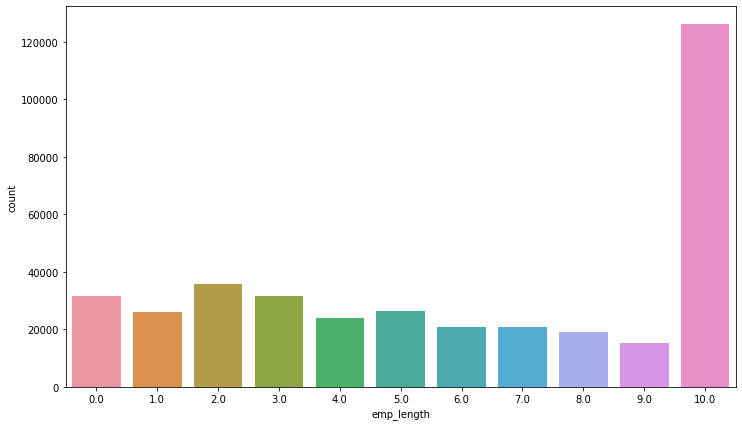

In [7]:
plt.figure(figsize=(12, 7))
sns.countplot(df.sort_values('emp_length')['emp_length'])

In [8]:
df.drop('emp_title', axis=1, inplace=True)
df.drop('title', axis=1, inplace=True)

In [9]:
df['emp_length'].fillna(df['emp_length'].median(), inplace=True)

In [10]:
df['revol_util'].fillna(df['revol_util'].mean(), inplace=True)

In [11]:
df['mort_acc'].fillna(round(df['mort_acc'].mean()), inplace=True)
df['pub_rec_bankruptcies'].fillna(round(df['pub_rec_bankruptcies'].mean()), inplace=True)

In [12]:
df['zipcode'] = df['address'].apply(lambda x: x.split()[-1])
df['state'] = df['address'].apply(lambda x: x.split()[-2])

In [13]:
df['state'].value_counts()

AP    14308
AE    14157
AA    13919
NJ     7091
WI     7081
LA     7068
NV     7038
AK     7034
MA     7022
VA     7022
VT     7005
NY     7004
MS     7003
TX     7000
SC     6973
ME     6972
AR     6969
OH     6969
GA     6967
ID     6958
IN     6958
KS     6945
WV     6944
RI     6940
MO     6939
IL     6934
WY     6933
HI     6927
NE     6927
IA     6926
FL     6921
AZ     6918
CO     6914
OK     6911
CT     6904
MN     6904
NC     6901
AL     6898
OR     6898
CA     6898
MD     6896
WA     6895
UT     6887
SD     6887
MT     6883
DE     6874
TN     6869
ND     6858
MI     6854
DC     6842
NM     6842
PA     6825
NH     6818
KY     6800
Name: state, dtype: int64

In [14]:
df['zipcode'].nunique()

10

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            396030 non-null  float64
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  dti                   396030 non-null  float64
 14  earliest_cr_line      396030 non-null  object 
 15  

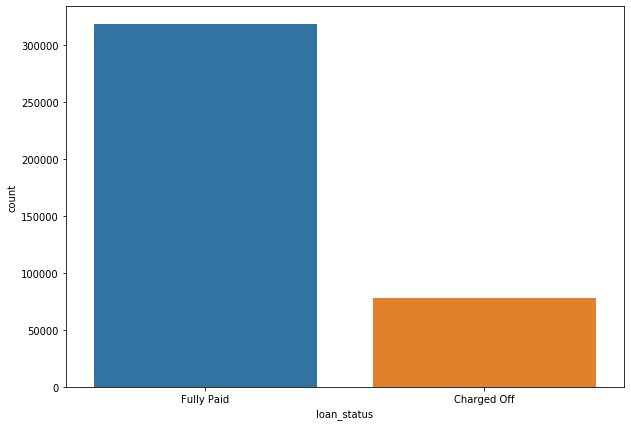

In [16]:
plt.figure(figsize=(10, 7))
sns.countplot(df['loan_status'])

In [17]:
df['earliest_cr_line'].value_counts()

Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
            ... 
Sep-1961       1
Apr-1960       1
Jan-1948       1
Aug-1951       1
Oct-1957       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [18]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: x.split('-')[1])
df['earliest_cr_month'] = df['earliest_cr_line'].apply(lambda x: x.split('-')[0])

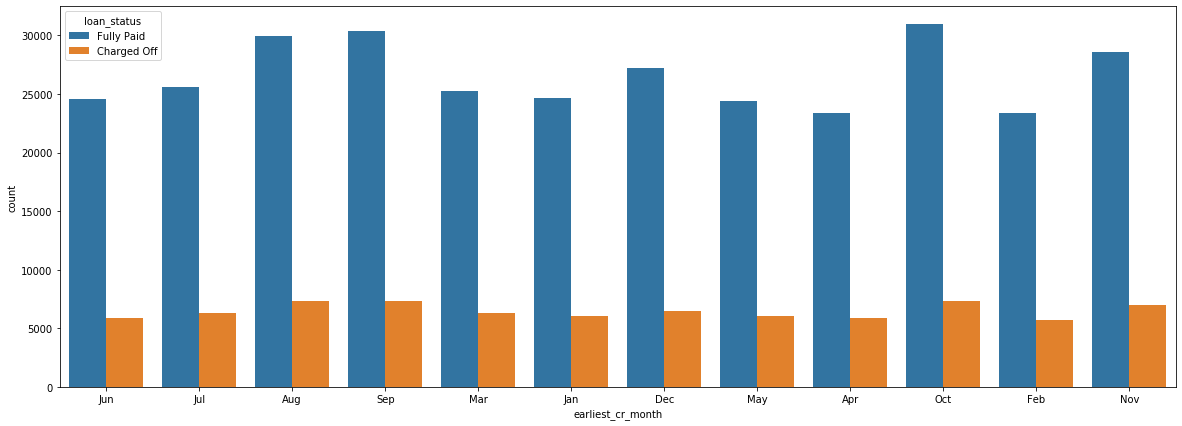

In [19]:
plt.figure(figsize=(20, 7))
sns.countplot(df['earliest_cr_month'], hue=df['loan_status'])

In [20]:
month_dict = {
    'Jan':1,
    'Feb':2,
    'Mar':3,
    'Apr':4,
    'May':5,
    'Jun':6,
    'Jul':7,
    'Aug':8,
    'Sep':9,
    'Oct':10,
    'Nov':11,
    'Dec':12
}

In [21]:
df['earliest_cr_month'] = df['earliest_cr_month'].map(month_dict)

In [22]:
df['earliest_cr_year'] = df['earliest_cr_year'].apply(int)

In [23]:
df.drop('earliest_cr_line', axis=1, inplace=True)

In [24]:
df['issue_month'] = df['issue_d'].apply(lambda x: x.split('-')[0])
df['issue_year'] = df['issue_d'].apply(lambda x: x.split('-')[1])

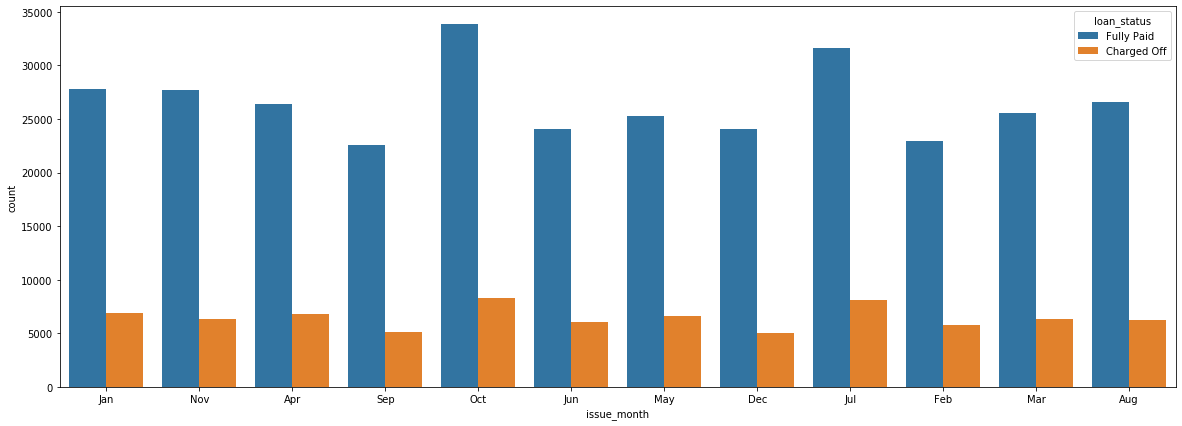

In [25]:
plt.figure(figsize=(20, 7))
sns.countplot(df['issue_month'], hue=df['loan_status'])

In [26]:
df['issue_month'] = df['issue_month'].map(month_dict)

In [27]:
df['issue_year'] = df['issue_year'].apply(int)

In [28]:
df.drop('issue_d', axis=1, inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            396030 non-null  float64
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  dti                   396030 non-null  float64
 13  open_acc              396030 non-null  float64
 14  pub_rec               396030 non-null  float64
 15  

In [30]:
df['verification_status'].value_counts()

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

In [31]:
df['sub_grade_lvl'] = df['sub_grade'].apply(lambda x:x[-1])

In [32]:
df.drop('sub_grade', axis=1, inplace=True)

In [33]:
term = pd.get_dummies(df['term'], drop_first=True)
grade = pd.get_dummies(df['grade'], drop_first=True)
home_ownership = pd.get_dummies(df['home_ownership'], drop_first=True)
verification_status = pd.get_dummies(df['verification_status'], drop_first=True)
purpose = pd.get_dummies(df['purpose'], drop_first=True)
initial_list_status = pd.get_dummies(df['initial_list_status'], drop_first=True)
application_type = pd.get_dummies(df['application_type'], drop_first=True)
zipcode = pd.get_dummies(df['zipcode'], drop_first=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   emp_length            396030 non-null  float64
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   loan_status           396030 non-null  object 
 10  purpose               396030 non-null  object 
 11  dti                   396030 non-null  float64
 12  open_acc              396030 non-null  float64
 13  pub_rec               396030 non-null  float64
 14  revol_bal             396030 non-null  float64
 15  

In [35]:
df = pd.concat([df, term, grade, home_ownership, verification_status, purpose, initial_list_status, application_type, zipcode], axis=1)

In [36]:
df.drop(['term', 'grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'zipcode'], axis=1, inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 60 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   emp_length            396030 non-null  float64
 4   annual_inc            396030 non-null  float64
 5   loan_status           396030 non-null  object 
 6   dti                   396030 non-null  float64
 7   open_acc              396030 non-null  float64
 8   pub_rec               396030 non-null  float64
 9   revol_bal             396030 non-null  float64
 10  revol_util            396030 non-null  float64
 11  total_acc             396030 non-null  float64
 12  mort_acc              396030 non-null  float64
 13  pub_rec_bankruptcies  396030 non-null  float64
 14  address               396030 non-null  object 
 15  

In [38]:
df.drop(['address', 'state'], axis=1, inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 58 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   emp_length            396030 non-null  float64
 4   annual_inc            396030 non-null  float64
 5   loan_status           396030 non-null  object 
 6   dti                   396030 non-null  float64
 7   open_acc              396030 non-null  float64
 8   pub_rec               396030 non-null  float64
 9   revol_bal             396030 non-null  float64
 10  revol_util            396030 non-null  float64
 11  total_acc             396030 non-null  float64
 12  mort_acc              396030 non-null  float64
 13  pub_rec_bankruptcies  396030 non-null  float64
 14  earliest_cr_year      396030 non-null  int64  
 15  

In [40]:
df['sub_grade_lvl'] = df['sub_grade_lvl'].apply(int)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 58 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   emp_length            396030 non-null  float64
 4   annual_inc            396030 non-null  float64
 5   loan_status           396030 non-null  object 
 6   dti                   396030 non-null  float64
 7   open_acc              396030 non-null  float64
 8   pub_rec               396030 non-null  float64
 9   revol_bal             396030 non-null  float64
 10  revol_util            396030 non-null  float64
 11  total_acc             396030 non-null  float64
 12  mort_acc              396030 non-null  float64
 13  pub_rec_bankruptcies  396030 non-null  float64
 14  earliest_cr_year      396030 non-null  int64  
 15  

In [42]:
loan_status = pd.get_dummies(df['loan_status'], drop_first=True)

In [43]:
df.drop('loan_status', axis=1, inplace=True)

In [44]:
df = pd.concat([df, loan_status], axis=1)

In [45]:
X = df.drop('Fully Paid', axis=1).values
y = df['Fully Paid'].values

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler()

In [50]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
X_train.shape

(316824, 57)

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [66]:
model = Sequential()

model.add(Dense(57, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(28, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) # Binary Classification => 'sigmoid' activation

model.compile(loss='binary_crossentropy', optimizer='adam')

In [54]:
from tensorflow.keras.callbacks import EarlyStopping

In [55]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [67]:
model.fit(x=X_train, y=y_train, epochs=300000, validation_data=(X_test, y_test), callbacks=[early_stop], batch_size=256)

Train on 316824 samples, validate on 79206 samples
Epoch 1/300000
316824/316824 [==============================] - 3s 10us/sample - loss: 0.4085 - val_loss: 0.2688
Epoch 2/300000
316824/316824 [==============================] - 3s 11us/sample - loss: 0.2970 - val_loss: 0.2662
Epoch 3/300000
316824/316824 [==============================] - 4s 12us/sample - loss: 0.2848 - val_loss: 0.2628
Epoch 4/300000
316824/316824 [==============================] - 4s 12us/sample - loss: 0.2797 - val_loss: 0.2632
Epoch 5/300000
316824/316824 [==============================] - 4s 13us/sample - loss: 0.2792 - val_loss: 0.2624
Epoch 6/300000
316824/316824 [==============================] - 4s 12us/sample - loss: 0.2771 - val_loss: 0.2628
Epoch 7/300000
316824/316824 [==============================] - 4s 12us/sample - loss: 0.2760 - val_loss: 0.2620
Epoch 8/300000
316824/316824 [==============================] - 4s 12us/sample - loss: 0.2756 - val_loss: 0.2629
Epoch 9/300000
316824/316824 [===============

In [68]:
loss_df = pd.DataFrame(model.history.history)

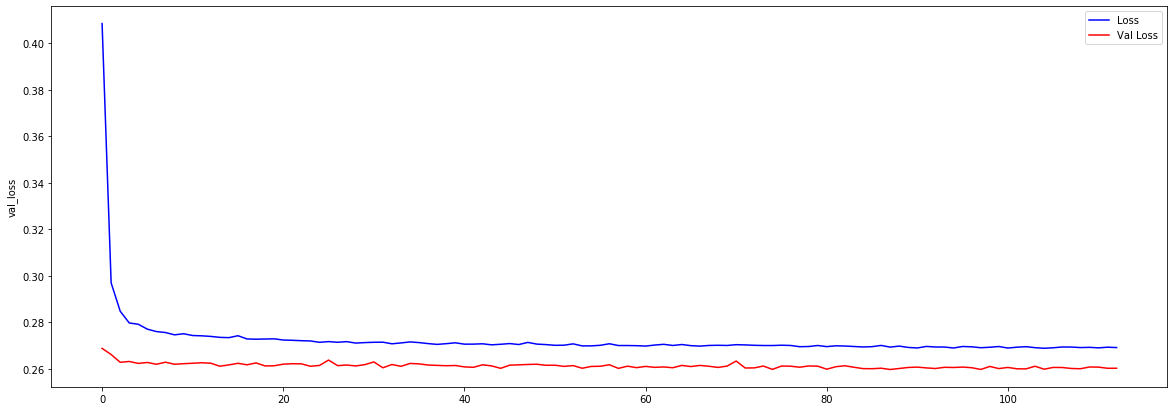

In [69]:
plt.figure(figsize=(20, 7))
sns.lineplot(y=loss_df['loss'], x=loss_df.index, color='blue', label='Loss')
sns.lineplot(y=loss_df['val_loss'], x=loss_df.index, color='red', label='Val Loss')
plt.legend()

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
pred = model.predict_classes(X_test)

In [71]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 6690  8887]
 [    0 63629]]
              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15577
           1       0.88      1.00      0.93     63629

    accuracy                           0.89     79206
   macro avg       0.94      0.71      0.77     79206
weighted avg       0.90      0.89      0.87     79206



In [62]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('Fully Paid',axis=1).iloc[random_ind]
new_customer

loan_amnt               24000.00
int_rate                   13.11
installment               547.43
emp_length                 10.00
annual_inc              85000.00
dti                        10.98
open_acc                    6.00
pub_rec                     0.00
revol_bal               35464.00
revol_util                 66.80
total_acc                  29.00
mort_acc                    8.00
pub_rec_bankruptcies        0.00
earliest_cr_year         1991.00
earliest_cr_month          10.00
issue_month                 1.00
issue_year               2013.00
sub_grade_lvl               4.00
 60 months                  1.00
B                           1.00
C                           0.00
D                           0.00
E                           0.00
F                           0.00
G                           0.00
MORTGAGE                    1.00
NONE                        0.00
OTHER                       0.00
OWN                         0.00
RENT                        0.00
Source Ver

In [63]:
new_customer = scaler.transform(new_customer.values.reshape(-1, 57))

In [72]:
model.predict_classes(new_customer)

array([[1]])

In [65]:
df.iloc[random_ind]['Fully Paid']

1.0